In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense,Input
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

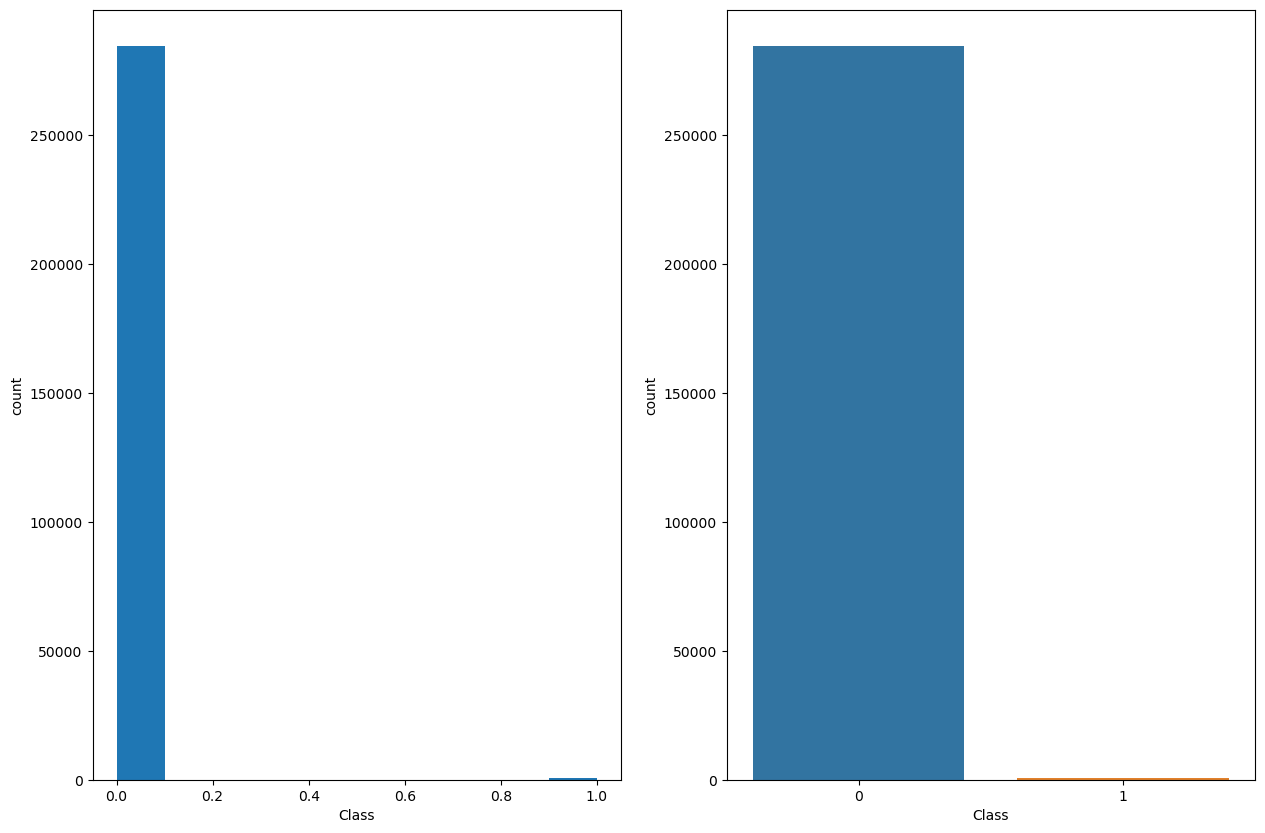

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.hist(data['Class'])
plt.xlabel("Class")
plt.ylabel("count")
plt.subplot(1,2,2)
sns.countplot(x='Class',data=data)
plt.show()

Text(0, 0.5, 'No of transactions')

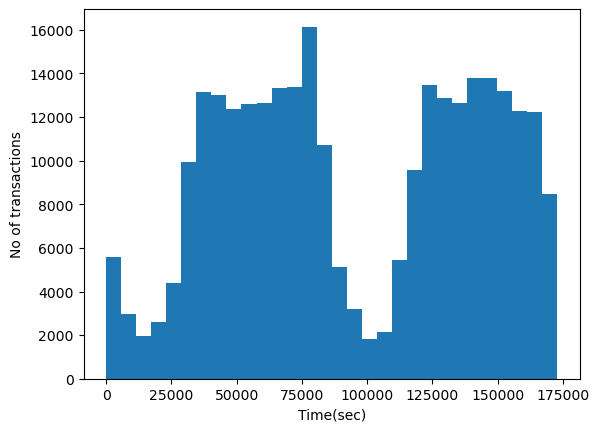

In [8]:
#Transaction over the period of timeline:

plt.hist(data['Time'],bins=30)
plt.xlabel("Time(sec)")
plt.ylabel("No of transactions")


Text(0, 0.5, 'No of transactions')

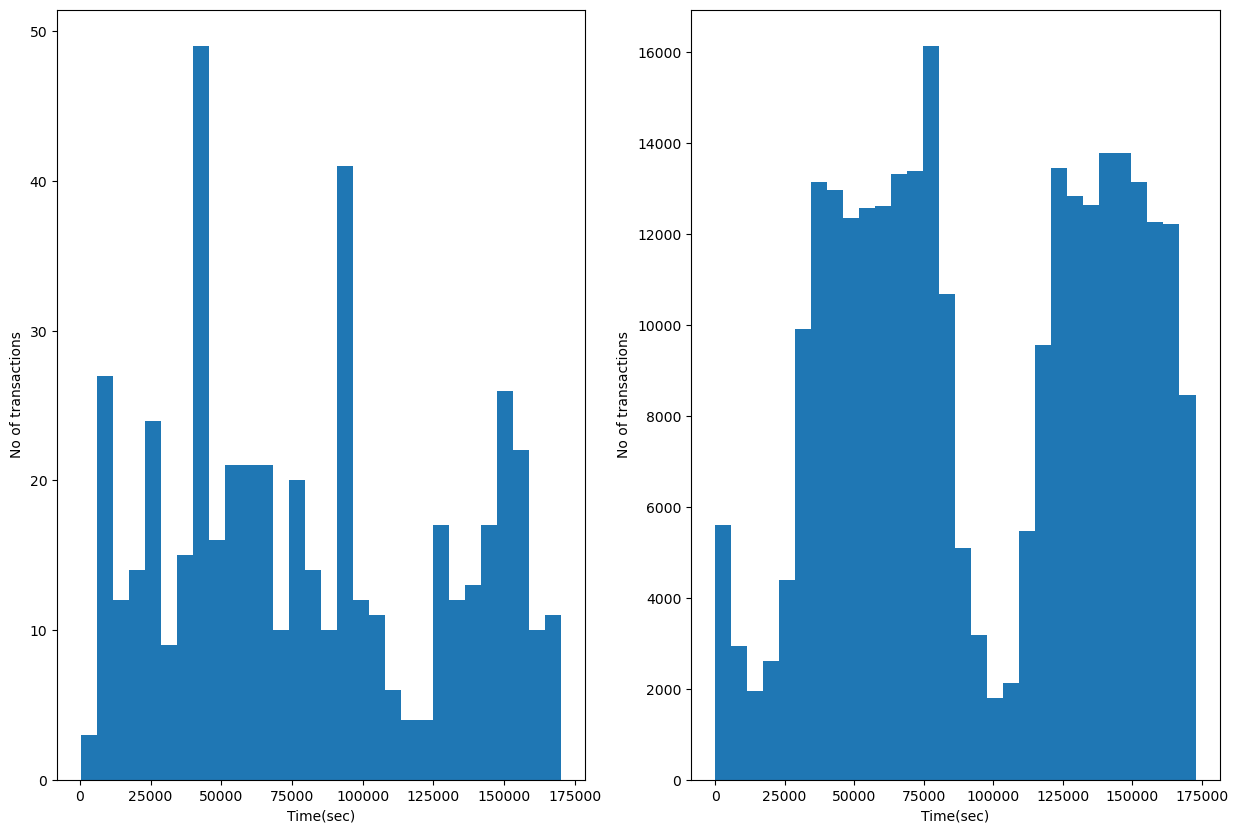

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
data_fraud=data[data['Class']==1.0]
plt.hist(data_fraud['Time'],bins=30)
plt.xlabel("Time(sec)")
plt.ylabel("No of transactions")
data_notfraud=data[data['Class']==0.0]
plt.subplot(1,2,2)
plt.hist(data_notfraud['Time'],bins=30)
plt.xlabel("Time(sec)")
plt.ylabel("No of transactions")


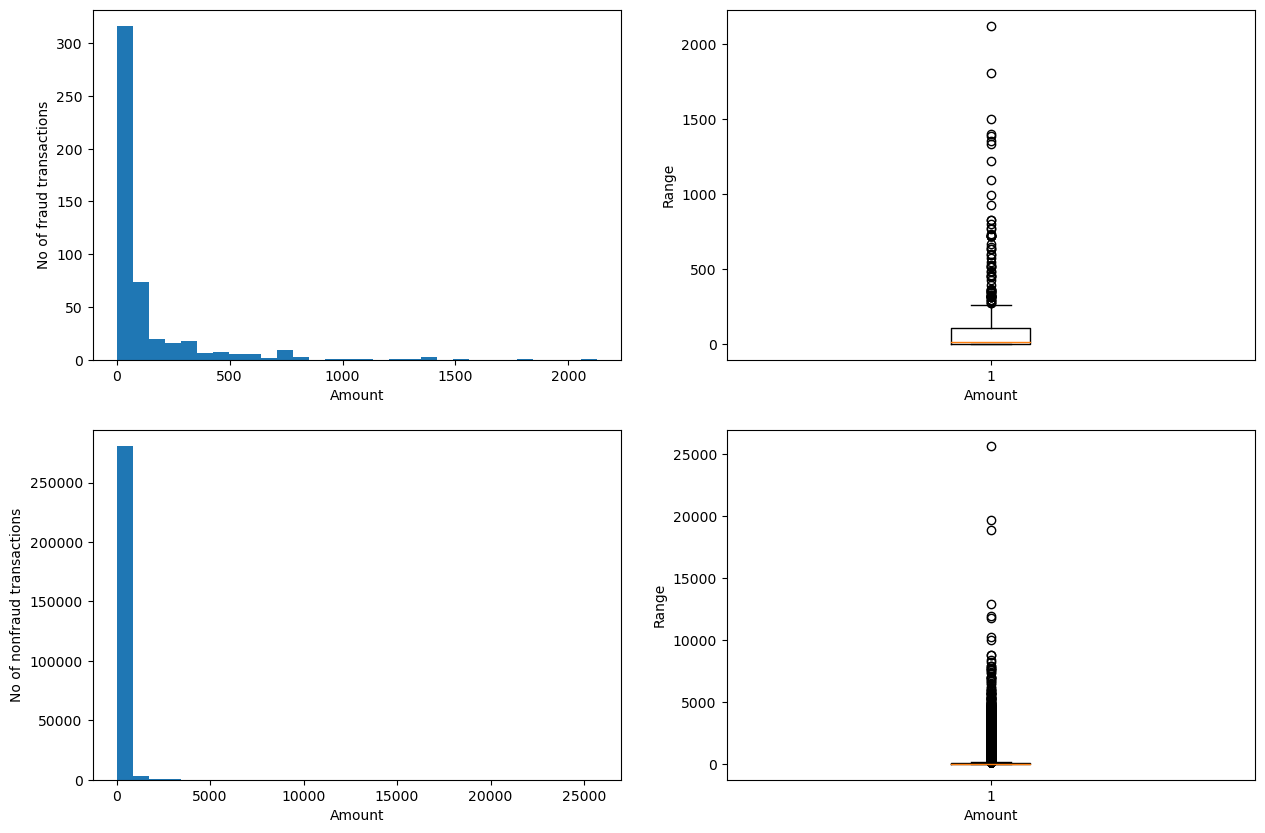

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(data_fraud['Amount'],bins=30)
plt.xlabel("Amount")
plt.ylabel("No of fraud transactions")

plt.subplot(2,2,2)
plt.boxplot(data_fraud['Amount'])
plt.xlabel("Amount")
plt.ylabel("Range")

plt.subplot(2,2,3)
plt.hist(data_notfraud['Amount'],bins=30)
plt.xlabel("Amount")
plt.ylabel("No of nonfraud transactions")

plt.subplot(2,2,4)
plt.boxplot(data_notfraud['Amount'])
plt.xlabel("Amount")
plt.ylabel("Range")


plt.show()

In [11]:
print("max amount of non fraudulent activity",max(data_notfraud['Amount']))
print("max amount of fraudulent activity",max(data_fraud['Amount']))

max amount of non fraudulent activity 25691.16
max amount of fraudulent activity 2125.87


In [12]:
newdata=data[data["Amount"]<=7000]

In [13]:
d_fraud=newdata[newdata['Class']==1.0]
d_notfraud=newdata[newdata['Class']==0.0]

Text(0, 0.5, 'Not fraud')

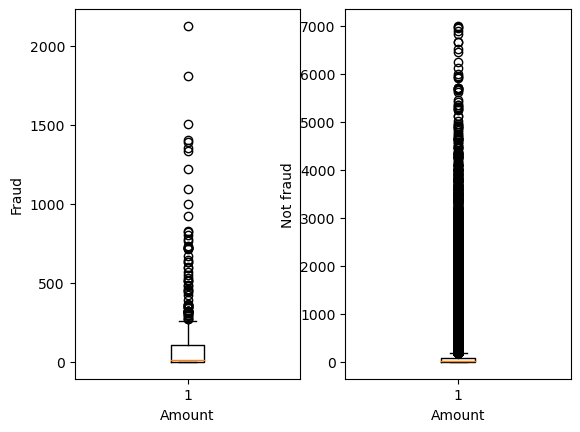

In [14]:
plt.subplot(1,2,1)
plt.boxplot(d_fraud['Amount'])
plt.xlabel("Amount")
plt.ylabel("Fraud")

plt.subplot(1,2,2)
plt.boxplot(d_notfraud['Amount'])
plt.xlabel("Amount")
plt.ylabel("Not fraud")

In [15]:
d_fraud.shape

(492, 31)

In [16]:
d_notfraud.shape

(284294, 31)

In [17]:
d_notfraud=d_notfraud.sample(2000)
df=pd.concat([d_notfraud,d_fraud])
df.reset_index(drop=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,120193.0,-0.454479,1.201642,0.081936,-0.695024,0.410704,-1.057838,1.041520,-0.210913,0.225049,...,-0.312785,-0.531973,0.083066,-0.005112,-0.375916,0.150884,0.476890,0.223036,13.98,0
1,27448.0,1.303368,0.488477,-0.264135,1.023362,0.205096,-0.990564,0.538543,-0.328244,-0.242658,...,-0.021893,-0.005398,-0.188224,0.044115,0.898259,-0.273836,-0.008782,0.007049,1.00,0
2,33218.0,-0.861320,0.734555,1.237692,-1.201557,0.688678,-0.091706,0.853961,0.245961,-0.781973,...,-0.281679,-0.862277,0.124715,-0.300671,-0.385808,0.539347,0.229008,0.136833,24.99,0
3,144006.0,2.120909,-0.008510,-2.252875,0.080872,0.659823,-1.296622,0.722109,-0.527219,0.104767,...,0.039098,0.144117,-0.073957,-0.652776,0.292546,0.771487,-0.132654,-0.085214,34.10,0
4,79376.0,1.246306,-0.398784,0.896384,-0.718228,-1.272253,-0.841904,-0.619613,0.006119,1.926386,...,-0.020288,0.157578,-0.027289,0.390533,0.476666,-0.684279,0.089114,0.033810,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
2488,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
2489,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
2490,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


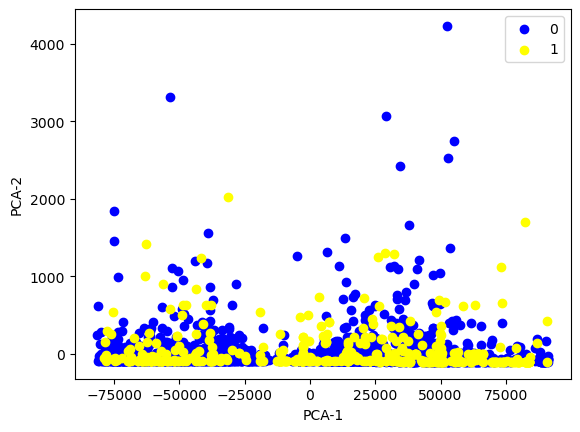

In [18]:
x=df.drop(['Class'],axis=1).values
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x)
x_pca=pca.transform(x)

y=df['Class'].values
color={0:'blue',1:'yellow'}
for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=x_pca[y==cl,0],y=x_pca[y==cl,1],c=color[idx],label=cl)
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.legend()

In [19]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.7,random_state=42)
scaler = StandardScaler()
scale=MinMaxScaler()
x_train = scaler.fit_transform(train_x)
x_test = scaler.transform(test_x)
reg=LogisticRegression(solver='lbfgs')
reg.fit(x_train,train_y)
pred_y=reg.predict(x_test)

print(classification_report(test_y,pred_y))
print("Accuracy:",accuracy_score(test_y,pred_y)*100,"%")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       604
           1       0.99      0.86      0.92       144

    accuracy                           0.97       748
   macro avg       0.98      0.93      0.95       748
weighted avg       0.97      0.97      0.97       748

Accuracy: 97.19251336898395 %


In [20]:
#Data is imbalanced even after re sampling so svm is not a good option
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC

In [21]:
svm=OneClassSVM(kernel='rbf',degree=3, gamma=0.1, nu=0.05)
svm.fit(x_train,train_y)
svm_pred_y=svm.predict(x_test)
print(accuracy_score(test_y,svm_pred_y))
print(classification_report(test_y,svm_pred_y))

0.12165775401069519
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       604
           1       0.14      0.63      0.23       144

    accuracy                           0.12       748
   macro avg       0.05      0.21      0.08       748
weighted avg       0.03      0.12      0.04       748



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [22]:
svc=SVC(kernel='rbf',degree=3, gamma=0.1)
svc.fit(train_x,train_y )
svc_pred_y=svm.predict(test_x)
print(accuracy_score(test_y,svc_pred_y))
print(classification_report(test_y,svc_pred_y))

0.0
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     604.0
           1       0.00      0.00      0.00     144.0

    accuracy                           0.00     748.0
   macro avg       0.00      0.00      0.00     748.0
weighted avg       0.00      0.00      0.00     748.0



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [23]:
tree=DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree.fit(x_train,train_y)
y_pred_tree=tree.predict(x_test)
print(classification_report(test_y,y_pred_tree))
print("Accuracy:",accuracy_score(test_y,y_pred_tree)*100,"%")

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       604
           1       0.94      0.85      0.89       144

    accuracy                           0.96       748
   macro avg       0.95      0.92      0.93       748
weighted avg       0.96      0.96      0.96       748

Accuracy: 95.98930481283422 %
